In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
version_name_mapping = {'nat':'vanilla',
                        'adv':'adversarial',
                        'cov':'robust'}

In [3]:
base_path = 'output_ppo'
df_hue_all = pd.DataFrame()

for folder_version in os.listdir(base_path):
    path_version = os.path.join(base_path, folder_version)
    version_name = version_name_mapping[folder_version.split('_')[-1]]
    experiment_folder = sorted(os.listdir(path_version))[-1]
    path_experiment = os.path.join(path_version, experiment_folder)

    test_folders = [f for f in os.listdir(path_experiment) if f.split('_')[0]=='test']
    
    df_hue = pd.DataFrame()
    for test_folder in test_folders:

        attack_type = test_folder.split('_')[-1]
        path_test = os.path.join(path_experiment, test_folder)

        attack_folders = [f for f in os.listdir(path_test) if f.split('-')[0]=='attack']
        for attack_folder in attack_folders:
            
            attack_entity = attack_folder.split('-')[2]

            file = pd.read_csv(os.path.join(path_test, attack_folder, 'rewards_lengths.csv'), index_col=0)
            rewards = file['rewards']
            df_hue[f'{attack_type}_{attack_entity}'] = rewards.values
    df_hue['version'] = version_name
    df_hue_all = pd.concat([df_hue_all, df_hue])
df_hue_all

,none_0.01,action_0.01,critic_0.01,sarsa_0.01,sarsa+action_0.01,random_0.01,random_0.05,random_0.1,random_0.075,random_0.025,version
0,172.513700,141.564611,233.246065,238.809467,231.413003,152.591624,25.025023,-37.725026,-3.430957,165.359731,vanilla
1,198.612280,210.101331,217.035103,216.228391,203.221963,202.712549,33.001888,-92.261409,-89.160702,206.769792,vanilla
2,225.576156,224.182506,230.728793,220.056386,219.704898,225.571363,226.062643,47.040568,78.517276,225.043280,vanilla
3,222.430237,217.030595,227.639704,182.802207,225.399188,224.308083,220.915484,-65.498280,-16.026603,224.621584,vanilla
4,231.876086,112.945821,231.244852,228.018788,120.087857,234.210027,106.112437,-0.670919,38.050569,125.871595,vanilla
...,...,...,...,...,...,...,...,...,...,...,...
95,-19.326200,194.874160,-7.476424,-36.556805,-8.181410,241.961179,259.911375,45.410191,262.454656,195.949305,robust
96,256.984352,261.174605,270.071781,-45.296275,177.858319,259.491429,269.786362,262.522718,270.108224,262.956976,robust
97,185.208566,267.044665,261.578866,-11.085656,195.971195,265.331239,265.057526,-2.437978,267.695500,265.059558,robust
98,253.039899,278.052734,279.466851,140.989816,245.061396,267.053766,268.002322,41.236390,272.292172,278.989952,robust


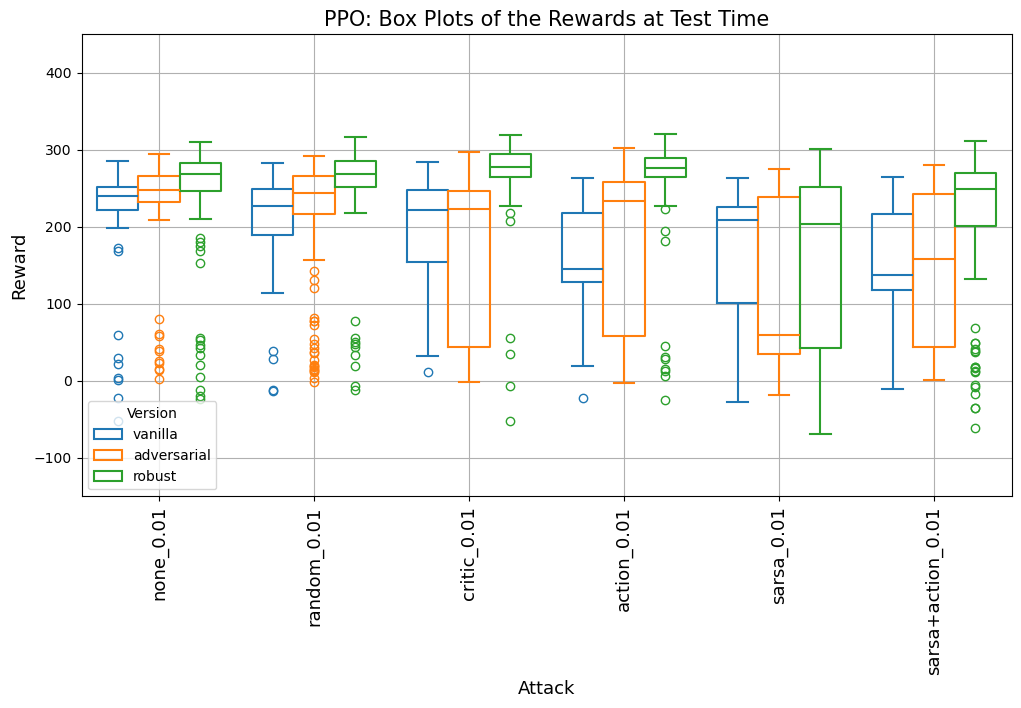

In [4]:
df_long = pd.melt(df_hue_all, id_vars=['version'], var_name='Method', value_name='Value')

# Creating box plots
plt.figure(figsize=(12, 6))
order = method_order = ['none_0.01', 'random_0.01', 'critic_0.01', 'action_0.01', 'sarsa_0.01', 'sarsa+action_0.01']
sns.boxplot(x='Method', y='Value', hue='version',
            data=df_long, fill=False, order=order)
plt.xticks(fontsize=13, rotation=90)
plt.ylabel('Reward', fontsize=13)
plt.xlabel('Attack', fontsize=13)
plt.title('PPO: Box Plots of the Rewards at Test Time', fontsize=15)
plt.grid(True)
plt.ylim([-150, 450])

# Set the location of the legend
plt.legend(loc='lower left', title='Version')

plt.show()


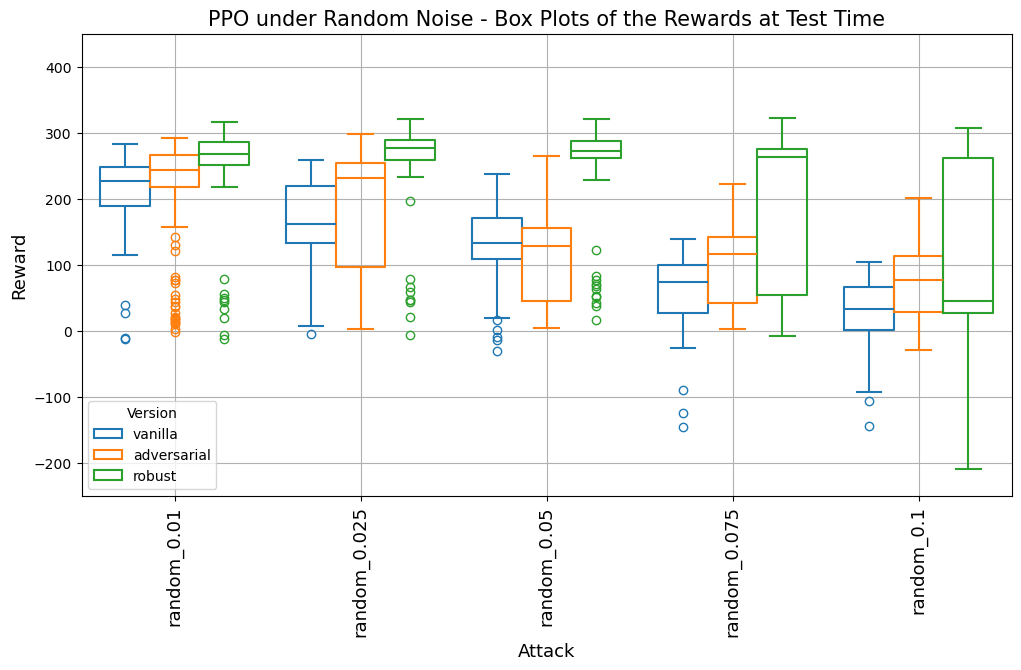

In [5]:
df_long = pd.melt(df_hue_all, id_vars=['version'], var_name='Method', value_name='Value')

# Creating box plots
plt.figure(figsize=(12, 6))
order = method_order = ['random_0.01', 'random_0.025', 'random_0.05', 'random_0.075', 'random_0.1',]
sns.boxplot(x='Method', y='Value', hue='version',
            data=df_long, fill=False, order=order)
plt.xticks(fontsize=13, rotation=90)
plt.ylabel('Reward', fontsize=13)
plt.xlabel('Attack', fontsize=13)
plt.title('PPO under Random Noise - Box Plots of the Rewards at Test Time', fontsize=15)
plt.grid(True)
plt.ylim([-250, 450])

# Set the location of the legend
plt.legend(loc='lower left', title='Version')

plt.show()

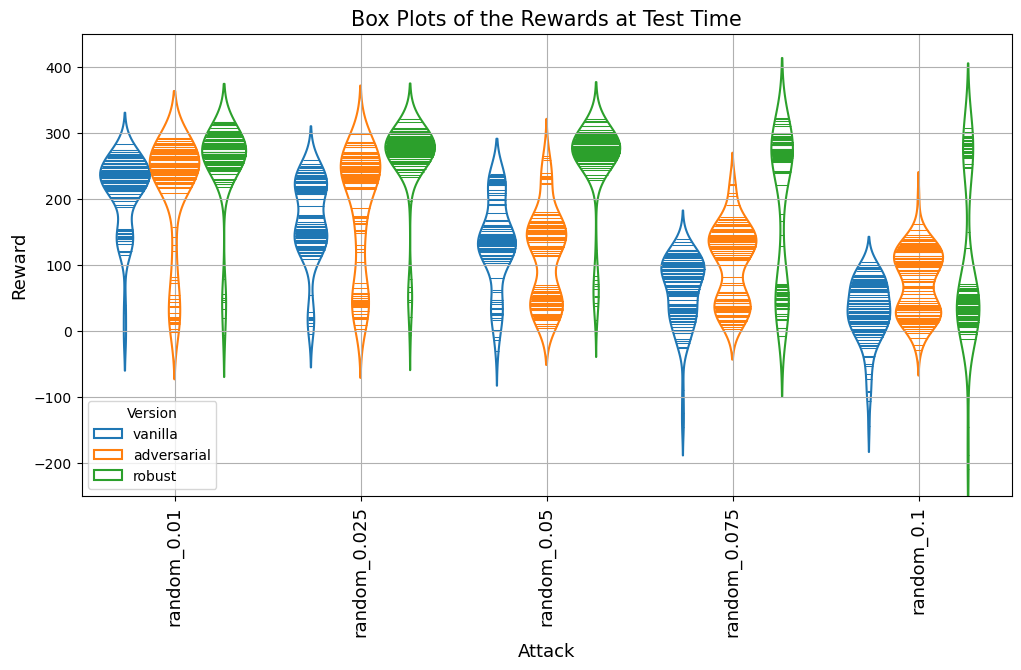

In [6]:
df_long = pd.melt(df_hue_all, id_vars=['version'], var_name='Method', value_name='Value')

# Creating box plots
plt.figure(figsize=(12, 6))
order = method_order = ['random_0.01', 'random_0.025', 'random_0.05', 'random_0.075', 'random_0.1']
sns.violinplot(x='Method', y='Value', hue='version',
            data=df_long, fill=False, order=order, inner='stick')
plt.xticks(fontsize=13, rotation=90)
plt.ylabel('Reward', fontsize=13)
plt.xlabel('Attack', fontsize=13)
plt.title('Box Plots of the Rewards at Test Time', fontsize=15)
plt.grid(True)
plt.ylim([-250, 450])

# Set the location of the legend
plt.legend(loc='lower left', title='Version')

plt.show()

In [7]:
# Summary

In [8]:
selected_columns = ['none_0.01', 'random_0.01', 'critic_0.01', 'action_0.01', 'sarsa_0.01', 'sarsa+action_0.01']
df_different_attacks = df_hue_all[selected_columns + ['version']]

df_different_attacks_vanilla = df_different_attacks[df_different_attacks['version']=='vanilla']
means = df_different_attacks_vanilla[selected_columns].mean(axis=0)
medians = df_different_attacks_vanilla[selected_columns].median(axis=0)
stds = df_different_attacks_vanilla[selected_columns].std(axis=0)
vanilla_overview = pd.DataFrame([means, medians, stds], index=['mean_vanilla', 'median_vanilla', 'std_vanilla']).T

df_different_attacks_adversarial = df_different_attacks[df_different_attacks['version']=='adversarial']
means = df_different_attacks_adversarial[selected_columns].mean(axis=0)
medians = df_different_attacks_adversarial[selected_columns].median(axis=0)
stds = df_different_attacks_adversarial[selected_columns].std(axis=0)
adversarial_overview = pd.DataFrame([means, medians, stds], index=['mean_adversarial', 'median_adversarial', 'std_adversarial']).T

df_different_attacks_robust = df_different_attacks[df_different_attacks['version']=='robust']
means = df_different_attacks_robust[selected_columns].mean(axis=0)
medians = df_different_attacks_robust[selected_columns].median(axis=0)
stds = df_different_attacks_robust[selected_columns].std(axis=0)
robust_overview = pd.DataFrame([means, medians, stds], index=['mean_robust', 'median_robust', 'std_robust']).T

overview = pd.concat([vanilla_overview, adversarial_overview, robust_overview], axis=1)
overview[['mean_vanilla', 'mean_adversarial', 'mean_robust',
          'median_vanilla', 'median_adversarial', 'median_robust',
          'std_vanilla', 'std_adversarial','std_robust']]

,mean_vanilla,mean_adversarial,mean_robust,median_vanilla,median_adversarial,median_robust,std_vanilla,std_adversarial,std_robust
none_0.01,222.060888,230.778973,241.180500,239.392752,247.461513,268.260752,63.765550,68.577140,80.092359
random_0.01,207.864863,207.666172,250.597789,226.610609,244.089887,267.890528,60.037424,89.761973,72.327025
critic_0.01,198.645200,156.788904,267.493369,222.121812,223.239680,277.882076,63.059957,106.249111,58.420309
action_0.01,162.068308,178.368119,258.270228,144.967310,233.936107,276.207832,58.731995,101.162702,70.635692
sarsa_0.01,164.627862,128.095320,156.929222,208.613863,59.619971,203.095797,87.569181,102.312415,121.224220
sarsa+action_0.01,152.195447,149.505284,204.437919,137.926487,157.623758,249.306288,66.747022,99.921875,106.477951


In [9]:
overview[['mean_vanilla', 'std_vanilla',
          'mean_adversarial', 'std_adversarial',
          'mean_robust', 'std_robust']].round(decimals=2)

,mean_vanilla,std_vanilla,mean_adversarial,std_adversarial,mean_robust,std_robust
none_0.01,222.06,63.77,230.78,68.58,241.18,80.09
random_0.01,207.86,60.04,207.67,89.76,250.60,72.33
critic_0.01,198.65,63.06,156.79,106.25,267.49,58.42
action_0.01,162.07,58.73,178.37,101.16,258.27,70.64
sarsa_0.01,164.63,87.57,128.10,102.31,156.93,121.22
sarsa+action_0.01,152.20,66.75,149.51,99.92,204.44,106.48


In [10]:
overview[['median_vanilla', 'median_adversarial', 'median_robust']].round(decimals=2)

,median_vanilla,median_adversarial,median_robust
none_0.01,239.39,247.46,268.26
random_0.01,226.61,244.09,267.89
critic_0.01,222.12,223.24,277.88
action_0.01,144.97,233.94,276.21
sarsa_0.01,208.61,59.62,203.10
sarsa+action_0.01,137.93,157.62,249.31


In [11]:
selected_columns = ['random_0.01', 'random_0.025', 'random_0.05', 'random_0.075', 'random_0.1']
df_different_attacks = df_hue_all[selected_columns + ['version']]

df_different_attacks_vanilla = df_different_attacks[df_different_attacks['version']=='vanilla']
means = df_different_attacks_vanilla[selected_columns].mean(axis=0)
medians = df_different_attacks_vanilla[selected_columns].median(axis=0)
stds = df_different_attacks_vanilla[selected_columns].std(axis=0)
vanilla_overview = pd.DataFrame([means, medians, stds], index=['mean_vanilla', 'median_vanilla', 'std_vanilla']).T

df_different_attacks_adversarial = df_different_attacks[df_different_attacks['version']=='adversarial']
means = df_different_attacks_adversarial[selected_columns].mean(axis=0)
medians = df_different_attacks_adversarial[selected_columns].median(axis=0)
stds = df_different_attacks_adversarial[selected_columns].std(axis=0)
adversarial_overview = pd.DataFrame([means, medians, stds], index=['mean_adversarial', 'median_adversarial', 'std_adversarial']).T

df_different_attacks_robust = df_different_attacks[df_different_attacks['version']=='robust']
means = df_different_attacks_robust[selected_columns].mean(axis=0)
medians = df_different_attacks_robust[selected_columns].median(axis=0)
stds = df_different_attacks_robust[selected_columns].std(axis=0)
robust_overview = pd.DataFrame([means, medians, stds], index=['mean_robust', 'median_robust', 'std_robust']).T

overview = pd.concat([vanilla_overview, adversarial_overview, robust_overview], axis=1)
overview[['mean_vanilla', 'mean_adversarial', 'mean_robust',
          'median_vanilla', 'median_adversarial', 'median_robust',
          'std_vanilla', 'std_adversarial','std_robust']]

,mean_vanilla,mean_adversarial,mean_robust,median_vanilla,median_adversarial,median_robust,std_vanilla,std_adversarial,std_robust
random_0.01,207.864863,207.666172,250.597789,226.610609,244.089887,267.890528,60.037424,89.761973,72.327025
random_0.025,167.354316,184.334637,258.240181,161.748768,232.037823,276.706194,63.824854,92.544108,66.878267
random_0.05,132.505991,113.423439,253.204421,133.327122,127.987842,272.290274,66.618414,70.366877,70.147569
random_0.075,59.459846,100.774460,184.117792,74.571044,116.369304,262.961082,53.552865,58.548098,114.187946
random_0.1,28.530718,72.224718,99.576934,33.154104,76.852510,44.373452,48.791619,49.356456,122.233842


In [12]:
overview[['mean_vanilla', 'std_vanilla',
          'mean_adversarial', 'std_adversarial',
          'mean_robust', 'std_robust']].round(decimals=2)

,mean_vanilla,std_vanilla,mean_adversarial,std_adversarial,mean_robust,std_robust
random_0.01,207.86,60.04,207.67,89.76,250.60,72.33
random_0.025,167.35,63.82,184.33,92.54,258.24,66.88
random_0.05,132.51,66.62,113.42,70.37,253.20,70.15
random_0.075,59.46,53.55,100.77,58.55,184.12,114.19
random_0.1,28.53,48.79,72.22,49.36,99.58,122.23


In [13]:
overview[['median_vanilla', 'median_adversarial', 'median_robust']].round(decimals=2)

,median_vanilla,median_adversarial,median_robust
random_0.01,226.61,244.09,267.89
random_0.025,161.75,232.04,276.71
random_0.05,133.33,127.99,272.29
random_0.075,74.57,116.37,262.96
random_0.1,33.15,76.85,44.37


1500


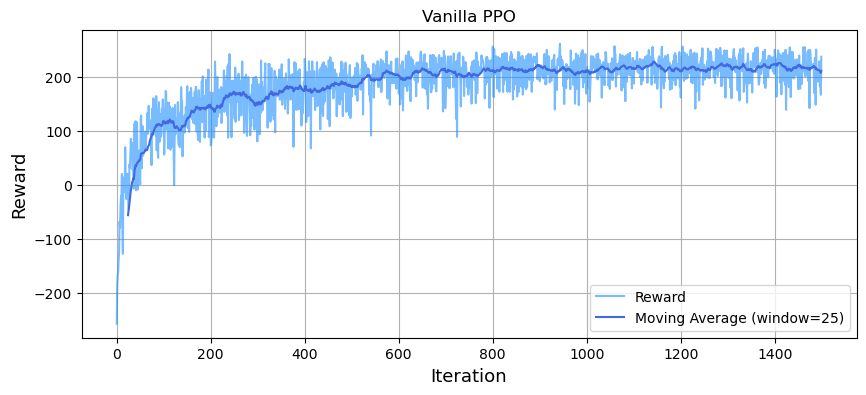

In [21]:
import re
import numpy as np

def extract_avg_ep_rewards(file_path):
    avg_ep_rewards = []

    with open(file_path, 'r') as file:
        for line in file:
            match = re.search(r'- avg_ep_reward: ([\d\.\-]+)', line)
            if match:
                avg_ep_rewards.append(float(match.group(1)))

    return avg_ep_rewards

# Example usage
file_path = 'output_ppo/LunarLander-v2_nat/20240623_1214/train.log'
avg_ep_rewards = extract_avg_ep_rewards(file_path)
print(len(avg_ep_rewards))

plt.figure(figsize=(10,4))

plt.plot(avg_ep_rewards, color='dodgerblue', alpha=0.6)
window_size = 25
ma = np.convolve(avg_ep_rewards, np.ones(window_size) / window_size, mode='valid')
nans = np.full(window_size - 1, np.nan)
ma = np.concatenate((nans, ma))
plt.plot(ma, color='royalblue')
plt.title('Vanilla PPO')
plt.xlabel('Iteration', fontsize=13)
plt.ylabel('Reward', fontsize=13)
plt.grid()
plt.legend(['Reward', f'Moving Average (window={window_size})'])

3000


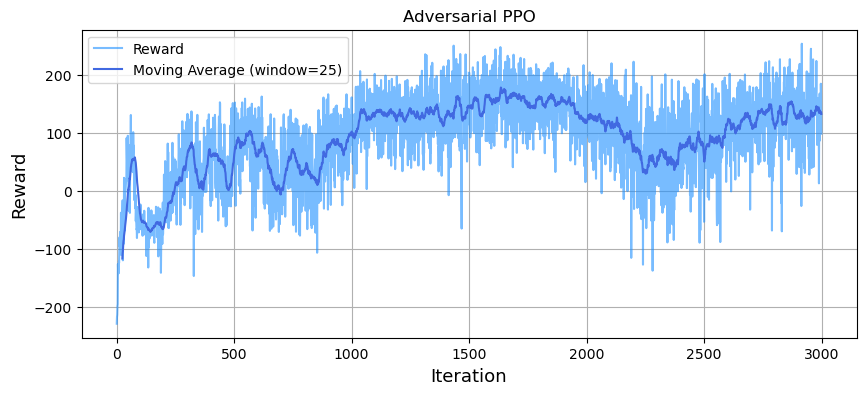

In [22]:
# Example usage
file_path = 'output_ppo/LunarLander-v2_adv/20240623_1216/train.log'
avg_ep_rewards = extract_avg_ep_rewards(file_path)
print(len(avg_ep_rewards))

plt.figure(figsize=(10,4))

plt.plot(avg_ep_rewards, color='dodgerblue', alpha=0.6)
window_size = 25
ma = np.convolve(avg_ep_rewards, np.ones(window_size) / window_size, mode='valid')
nans = np.full(window_size - 1, np.nan)
ma = np.concatenate((nans, ma))
plt.plot(ma, color='royalblue')
plt.title('Adversarial PPO')
plt.xlabel('Iteration', fontsize=13)
plt.ylabel('Reward', fontsize=13)
plt.grid()
plt.legend(['Reward', f'Moving Average (window={window_size})'])

1500


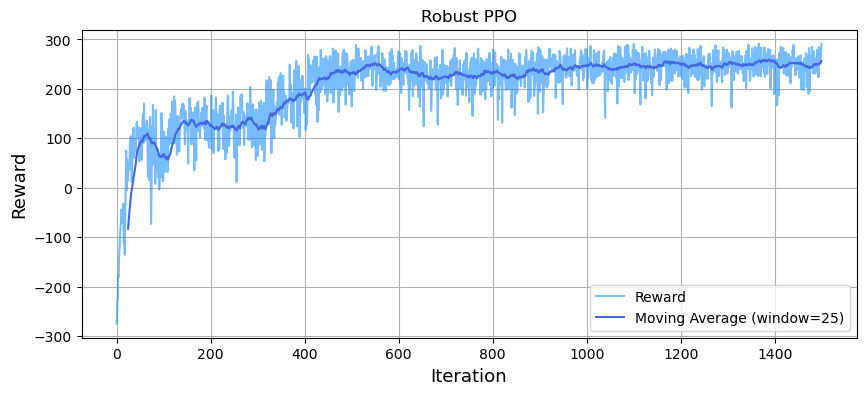

In [23]:
# Example usage
file_path = 'output_ppo/LunarLander-v2_cov/20240623_1626/train.log'
avg_ep_rewards = extract_avg_ep_rewards(file_path)
print(len(avg_ep_rewards))

plt.figure(figsize=(10,4))

plt.plot(avg_ep_rewards, color='dodgerblue', alpha=0.6)
window_size = 25
ma = np.convolve(avg_ep_rewards, np.ones(window_size) / window_size, mode='valid')
nans = np.full(window_size - 1, np.nan)
ma = np.concatenate((nans, ma))
plt.plot(ma, color='royalblue')
plt.title('Robust PPO')
plt.xlabel('Iteration', fontsize=13)
plt.ylabel('Reward', fontsize=13)
plt.grid()
plt.legend(['Reward', f'Moving Average (window={window_size})'])